## Table of Contents

- [1 - Packages](#1)
- [2 - Mô tả bài toán](#2)
- [3 - Modeling the plate in ansys](#3)
    - [3.1 - Start Prep7](#3-1)
    - [3.2 - Setting up parameters](#3-2)
    - [3.3 - Types](#3-3)
    - [3.4 - Materials](#3-4)
    - [3.5 - Sections](#3-5)
    - [3.6 - Meshing](#3-6)
    - [3.7 - Boundary](#3-7)
    - [3.8 - Solve](#3-8)
    - [3.9 - Plot resuls](#3-9)
- [4- Create Data](#4)
    - [4.1 - Forward Pooling](#4-1)
        - [Exercise 4 - pool_forward](#ex-4)
- [5 - Backpropagation in Convolutional Neural Networks (OPTIONAL / UNGRADED)](#5)
    - [5.1 - Convolutional Layer Backward Pass](#5-1)
        - [5.1.1 - Computing dA](#5-1-1)
        - [5.1.2 - Computing dW](#5-1-2)
        - [5.1.3 - Computing db](#5-1-3)

- [10 - Close mapdl](#Exit)

<a name='1'></a>
## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [ansys mapdl core](https://mapdl.docs.pyansys.com/) is documentation of ansys pymapdl

- pip install trame trame-vtk trame-vuetify trame-plotly

In [4]:
from ansys.mapdl.core import launch_mapdl
import numpy as np
import os
import matplotlib.pyplot as plt
import pyvista as pv
from pyvista import themes
from scipy.special import comb
mapdl = launch_mapdl()
print(mapdl)

PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Product:             Ansys Mechanical Enterprise
MAPDL Version:       21.2
ansys.mapdl Version: 0.68.0



<a name='2'></a>
## 2 - Mô tả bài toán

<div style="text-align:center;">
    <img id="fig1" src="images/Square%20laminated%20plate.png" style="width:350px;height:200px;">
    <div style="font-style:italic;">Figure 1: The square laminated plate modeled with a grid of 9 × 9.</div>
</div>

Simply supported three-ply
$$ 
\begin{bmatrix}
0° & 90° & 0° \\
\end{bmatrix}
$$
square laminated plate modelled with a grid of 9 × 9
To evaluate the effectiveness of the proposed method, a composite plate with three‐layers [0° 90° 0°]
is employed as shown in <a href="#fig1">Figure 1</a> . All layers of the plate are assumed to be of the same linearly elastic 
composite material. The material parameters of the layers are: $𝐺_{12} = 𝐺_{13} = 0.6𝐸_{2}; 𝐺_{23} =
0.5𝐸_{2}; 𝐸_{1}⁄𝐸_{2} = 40$ and $\nu_{12} = 0.25$. Where the subscripts 1, 2 indicate the parallel and the 
perpendicular directions to the fibres. The thickness of the plate is $t$ = 0.1m, whereas the length and 
width of the plate are $𝐿𝑥 = 𝐿𝑦 = 1(m)$. The thickness of each layer is 𝑡

<a name='3'></a>
## 3. Modelling the plate in ansys

<a name='3-1'></a>
### 3.1. Start Prep 7

In [5]:
mapdl.clear()
mapdl.prep7()
mapdl.units("SI")  # SI - International system (m, kg, s, K).

SI UNITS SPECIFIED FOR INTERNAL    
  LENGTH        (l)  = METER (M)
  MASS          (M)  = KILOGRAM (KG)
  TIME          (t)  = SECOND (SEC)
  TEMPERATURE   (T)  = KELVIN (K)
  TOFFSET            = 0.0 KELVIN
  CHARGE        (Q)  = COULOMB
  FORCE         (f)  = NEWTON (N) (KG-M/SEC2)
  HEAT               = JOULE (N-M)

  PRESSURE           = PASCAL (NEWTON/M**2)
  ENERGY        (W)  = JOULE (N-M)
  POWER         (P)  = WATT (N-M/SEC)
  CURRENT       (i)  = AMPERE (COULOMBS/SEC)
  CAPACITANCE   (C)  = FARAD
  INDUCTANCE    (L)  = HENRY
  MAGNETIC FLUX      = WEBER
  RESISTANCE    (R)  = OHM
  ELECTRIC POTENTIAL = VOLT

 INPUT  UNITS ARE ALSO SET TO SI

<a name='3-2'></a>
### 3.2. Setting up parameters

In [6]:
# ! Thiết lập các thông số vật liệu
# ! Các thông số E1, E2, E3, G12, G13, G23, v12, v13, v23, và v21 từ tài liệu của bạn

El_2 = 5e2 # Pa
El_1 = 40*El_2 # Pa
El_3 = El_2   # Pa
G12 = 0.6*El_2 # Pa
G13 = 0.6*El_2 # Pa
G23 = 0.5*El_2  # Pa
v12 = 0.25
v13 = 0.25
v23 = 0.25
v21 = v12*El_2/El_1

# ! Thiết lập thông số tấm và kích thước
thickness = 0.05 # Độ dày của tấm (m)
width = 1       # Chiều rộng của tấm (m)
length = 1      # Chiều dài của tấm (m)

# ! Tạo mô hình tấm ba lớp bằng cách kết hợp các lớp vật liệu
# ! Ví dụ: lớp 0/90/0
t1 = thickness/3
t2 = thickness/3
t3 = thickness/3

# ! Thiết lập số lượng phần tử
num_elements_x = 10 # Số lượng phần tử theo chiều x
num_elements_y = 10 # Số lượng phần tử theo chiều y


<a name='3-3'></a>
### 3.3. Element Type

In [7]:
# Girder: Shell181
mapdl.et(1,'Shell181')
# Mapdl.keyopt(itype='', knum='', value=''
mapdl.keyopt(1,8,1)

ELEMENT TYPE       1 IS SHELL181     4-NODE SHELL                
  KEYOPT( 1- 6)=        0      0      0        0      0      0
  KEYOPT( 7-12)=        0      1      0        0      0      0
  KEYOPT(13-18)=        0      0      0        0      0      0

 CURRENT NODAL DOF SET IS  UX    UY    UZ    ROTX  ROTY  ROTZ
  THREE-DIMENSIONAL MODEL

<a name="3-4"></a>
### 3.4. Materials

In [8]:
# alpha = np.linspace(0.96,1,5)
# print(alpha)
# for i in range(5):
#     mapdl.mp('ex',i+1,El_1*alpha[i])
#     mapdl.mp('ey',i+1,El_2*alpha[i])
#     mapdl.mp('ez',i+1,El_3*alpha[i])
#     mapdl.mp('PRXY',i+1,v12)
#     mapdl.mp('PRYZ',i+1,v23)
#     mapdl.mp('PRXZ',i+1,v13)
#     mapdl.mp('GXY',i+1,G12)
#     mapdl.mp('GYZ',i+1,G23)
#     mapdl.mp('GXZ',i+1,G13)
#     mapdl.mp('DENS',i+1,1)
# mapdl.mplist()

mapdl.mp('ex',1,El_1)
mapdl.mp('ey',1,El_2)
mapdl.mp('ez',1,El_3)
mapdl.mp('PRXY',1,v12)
mapdl.mp('PRYZ',1,v23)
mapdl.mp('PRXZ',1,v13)
mapdl.mp('GXY',1,G12)
mapdl.mp('GYZ',1,G23)
mapdl.mp('GXZ',1,G13)
mapdl.mp('DENS',1,1)

MATERIAL          1     DENS =   1.000000

<a name='3-5'></a>
### 3.5. Sections

In [9]:
# 2. Shell
mapdl.sectype(1,'shells','','CompositePlate')
mapdl.secdata(t1,1,0.0,3)
mapdl.secdata(t2,1,90.0,3)
mapdl.secdata(t3,1,0.0,3)
mapdl.secoffset('MID')

SHELL SECTION WITH SECTION ID NUMBER      1 IS OFFSET TO MID SURFACE OF SHELL

  Layer      Thickness   MatID   Ori. Angle  Num Intg. Pts

      1        0.0167     1        0.0000     3
      2        0.0167     1       90.0000     3
      3        0.0167     1        0.0000     3

  Section Solution Controls
  User Transverse Shear Stiffness (11)=  0.0000    
                                  (22)=  0.0000    
                                  (12)=  0.0000    
  Added Mass Per Unit Area            =  0.0000    
  Hourglass Scale Factor; Membrane    =  1.0000    
                          Bending     =  1.0000    
  Drill Stiffness Scale Factor        =  1.0000

<a name='3-6'></a> 
### 3.6 Modeling

In [10]:
mapdl.rectng(0,width,0,length)

1

In [11]:
mapdl.lesize(1,'','',num_elements_x,'','','','',1)
mapdl.lesize(3,'','',num_elements_x,'','','','',1)
mapdl.lesize(2,'','',num_elements_y,'','','','',1)
mapdl.lesize(4,'','',num_elements_y,'','','','',1)

SET DIVISIONS ON LINE     4 (IF SELECTED)
      TO  NDIV =   10,  SPACING RATIO =   1.000
 NDIV AND SPACE CAN BE OVERRIDDEN FOR CURVATURE OR PROXIMITY

c:\Users\levu\.conda\envs\Pymapdl\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

Please install `ipywidgets`.

Falling back to a static output.
  warnings.warn(


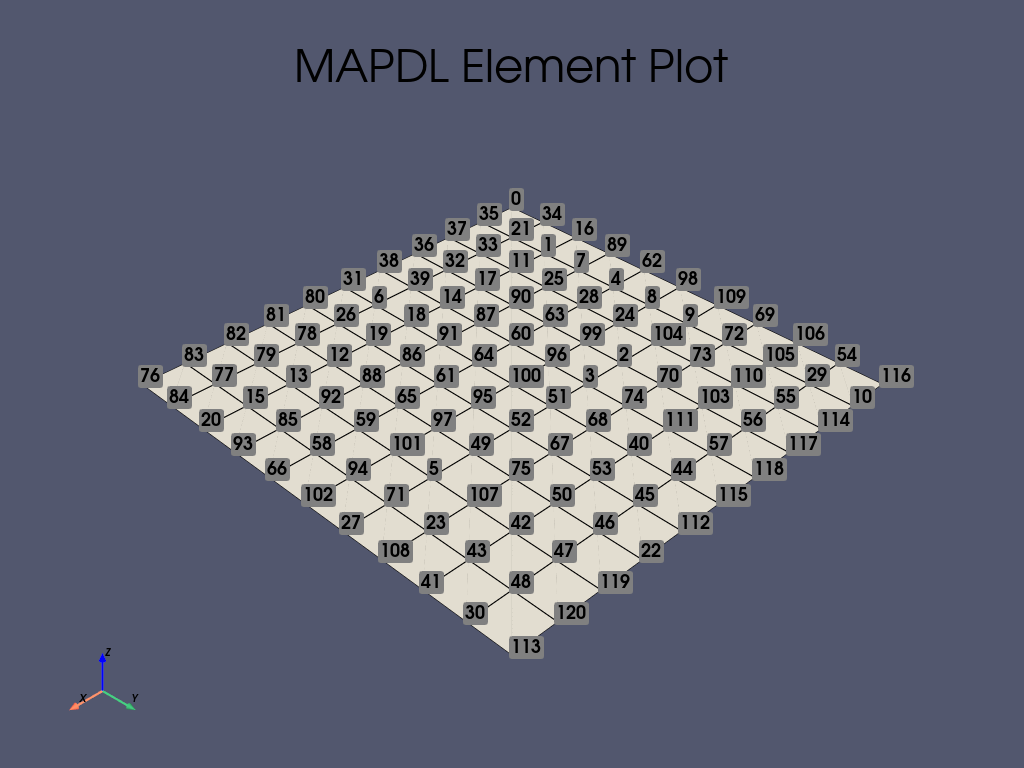

LIST ALL SELECTED ELEMENTS.  (LIST NODES)

 *** ANSYS - ENGINEERING ANALYSIS SYSTEM  RELEASE 2021 R2          21.2     ***
 DISTRIBUTED Ansys Mechanical Enterprise                       

 00000000  VERSION=WINDOWS x64   14:34:45  APR 01, 2024 CP=      0.578

                                                                               


 
    ELEM MAT TYP REL ESY SEC        NODES
 
       1   1   1   1   0   1      1     3    41    40
       2   1   1   1   0   1      3     4    50    41
       3   1   1   1   0   1      4     5    59    50
       4   1   1   1   0   1      5     6    68    59
       5   1   1   1   0   1      6     7    77    68
       6   1   1   1   0   1      7     8    86    77
       7   1   1   1   0   1      8     9    95    86
       8   1   1   1   0   1      9    10   104    95
       9   1   1   1   0   1     10    11   113   104
      10   1   1   1   0   1     11     2    13   113
      11   1   1   1   0   1     40    41    42    39
      12   1   1  

In [12]:
mapdl.amesh(na1='ALL', na2='', ninc='')
# plot the finite element mesh
mapdl.eplot(show_node_numbering=True)
mapdl.elist()

<a name='3-7'></a>
### 3.7. Boundary

In [13]:
mapdl.dl(line='all', area='', lab='all', value1='0', value2='')

CONSTRAINT AT ALL SELECTED LINES
      LOAD LABELS = UX    UY    UZ    ROTX  ROTY  ROTZ
      VALUES =      0.0000         0.0000

<a name='Solve'></a>
### 3.8. Solve

In [14]:
# mapdl.antype(4)
# mapdl.trnopt('full')
# mapdl.lumpm(0)

# mapdl.run("/solu")


# mapdl.outres('erase')
# mapdl.outres('all','all')
# mapdl.kbc(0)
# # ALPHAD, alpha_value
# # mapdl.alphad(0.02)
# mapdl.betad(0.001)

# a = np.array([[100,5,5,190],
#               [1,1.05,1.1,6],
#               [0,1000,0,0],
#               [1,2,3,4]])
# for i in range(a.shape[1]):
#     mapdl.nsubst(a[0,i])
#     mapdl.time(a[1,i])
#     mapdl.f(61,'fz',a[2,i])
#     mapdl.lswrite(a[3,i])

# print(i)
# mapdl.lssolve(1,a.shape[1],1)

# mapdl.run("/post26")

# # a = mapdl.post_processing.time_values
# dem = 0
# ele = np.array([11,21,31,42,51,71,81,91,101,111])
# data = np.zeros([11,10,300])
# for j in range(ele.shape[0]):
#     b = mapdl.nsol(2,ele[j],'u','z','')
#     data[0,j,:]=b.T
#     print(b)
# print(data)




In [ ]:
# # ele_dam = np.array([[12,15,19,32,35,39,52,55,59,69],[10,15,20,25,30,10,15,20,25,30]])
# mapdl.antype(4)
# mapdl.trnopt('full')
# mapdl.lumpm(0)

# data = np.zeros([10,8,10000])

# mapdl.run("/solu")


# mapdl.outres('erase')
# mapdl.outres('all','all')
# mapdl.kbc(0)
# # ALPHAD, alpha_value
# # mapdl.alphad(0.02)
# mapdl.betad(0.001)

# a = np.genfromtxt('C:\\Users\\vulv2\\OneDrive\\CompositePaper\\KQ ANSYS\\TH1-1\\Data\\data.csv', delimiter=',', skip_header=0)
# # a = np.array([[100,5,5,190],
# #             [1,1.05,1.1,6],
# #             [0,1000,0,0],
# #             [1,2,3,4]])
# for i in range(a.shape[1]):
#     mapdl.nsubst(a[0,i])
#     mapdl.time(a[1,i])
#     mapdl.f(26,'fz',a[2,i])
#     mapdl.lswrite(a[3,i])

# print(i)
# mapdl.lssolve(1,a.shape[1],1)

# mapdl.run("/post26")

# # a = mapdl.post_processing.time_values
# sensor = np.array([21,22,23,24,25,29,30,27])
# for j in range(sensor.shape[0]):
#     b = mapdl.nsol(2,sensor[j],'u','z','')
#     data[0,j,:]=b.T
#     print(b)


    
# print(data)

In [ ]:
# mapdl.prep7()

# mapdl.esel('S', 'ELEM', '', 'ALL')
# mapdl.emodif('ALL', 'SEC', 1)
# mapdl.emodif('ALL', 'MAT', 1)

# mapdl.mp('ex',2,El_1*0.5)
# mapdl.mp('ey',2,El_2*0.5)
# mapdl.mp('ez',2,El_3*0.5)
# mapdl.mp('PRXY',2,v12)
# mapdl.mp('PRYZ',2,v23)
# mapdl.mp('PRXZ',2,v13)
# mapdl.mp('GXY',2,G12*0.5)
# mapdl.mp('GYZ',2,G23*0.5)
# mapdl.mp('GXZ',2,G13*0.5)
# mapdl.mp('DENS',2,1)

# mapdl.sectype(2,'shells','','CompositePlate')
# mapdl.secdata(t1,2,0.0,3)
# mapdl.secdata(t2,2,90.0,3)
# mapdl.secdata(t3,2,0.0,3)
# mapdl.secoffset('MID')


# mapdl.esel('S', 'ELEM', '', 13)
# mapdl.emodif('ALL', 'SEC', 2)
# mapdl.emodif('ALL', 'MAT', 2)

# mapdl.esel('S', 'ELEM', '', 'ALL')


# mapdl.run("/solu")

# mapdl.outres('erase')
# mapdl.outres('all','all')
# mapdl.kbc(0)
# # ALPHAD, alpha_value
# # mapdl.alphad(0.02)
# mapdl.betad(0.001)

# a = np.genfromtxt('C:\\Users\\vulv2\\OneDrive\\CompositePaper\\KQ ANSYS\\TH1-1\\Data\\data.csv', delimiter=',', skip_header=0)
# # a = np.array([[100,5,5,190],
# #             [1,1.05,1.1,6],
# #             [0,1000,0,0],
# #             [1,2,3,4]])
# for i in range(a.shape[1]):
#     mapdl.nsubst(a[0,i])
#     mapdl.time(a[1,i])
#     mapdl.f(26,'fz',a[2,i])
#     mapdl.lswrite(a[3,i])

# print(i)
# mapdl.lssolve(1,a.shape[1],1)

# mapdl.run("/post26")

# # a = mapdl.post_processing.time_values
# sensor = np.array([21,22,23,24,25,29,30,27])
# for j in range(sensor.shape[0]):
#     b = mapdl.nsol(2,sensor[j],'u','z','')
#     data[1,j,:]=b.T
#     print(b)

# print(data)


In [15]:
import numpy as np
sensor = np.linspace(41,121,41)
sensor

array([ 41.,  43.,  45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,
        63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,
        85.,  87.,  89.,  91.,  93.,  95.,  97.,  99., 101., 103., 105.,
       107., 109., 111., 113., 115., 117., 119., 121.])

In [16]:
ele_dam = np.array([[1,2,3,4,5,12,13,14,15,23,24,25,34,35,45],[50,50,50,50,50,50,50,50,50,50,50,50,50,50,50]])

mapdl.antype(4)
mapdl.trnopt('full')
mapdl.lumpm(0)

# Load file lực tác dụng
current_directory = os.getcwd()
file_path = os.path.join(current_directory,"FF1.csv")
a = np.genfromtxt(file_path, delimiter=',', skip_header=0)

# Features (node)
# sensor = np.array([12,14,16,18,23,25,27,29,32,34,36,38,43,45,47,49])
sensor = np.linspace(41,121,41)

data = np.zeros([ele_dam.shape[1],sensor.shape[0],25000])

for k in range(ele_dam.shape[1]):
    mapdl.prep7()

    mapdl.esel('S', 'ELEM', '', 'ALL')
    mapdl.emodif('ALL', 'SEC', 1)
    mapdl.emodif('ALL', 'MAT', 1)
    
    mapdl.mp('ex',2,El_1*(1-ele_dam[1,k]/100))
    mapdl.mp('ey',2,El_2*(1-ele_dam[1,k]/100))
    mapdl.mp('ez',2,El_3*(1-ele_dam[1,k]/100))
    mapdl.mp('PRXY',2,v12)
    mapdl.mp('PRYZ',2,v23)
    mapdl.mp('PRXZ',2,v13)
    mapdl.mp('GXY',2,G12*(1-ele_dam[1,k]/100))
    mapdl.mp('GYZ',2,G23*(1-ele_dam[1,k]/100))
    mapdl.mp('GXZ',2,G13*(1-ele_dam[1,k]/100))
    mapdl.mp('DENS',2,1)

    mapdl.sectype(2,'shells','','CompositePlate')
    mapdl.secdata(t1,2,0.0,3)
    mapdl.secdata(t2,2,90.0,3)
    mapdl.secdata(t3,2,0.0,3)
    mapdl.secoffset('MID')

    mapdl.esel('S', 'ELEM', '', ele_dam[0,k])
    mapdl.emodif('ALL', 'SEC', 2)
    mapdl.emodif('ALL', 'MAT', 2)

    mapdl.esel('S', 'ELEM', '', 'ALL')
     
    mapdl.run("/solu")


    mapdl.outres('erase')
    mapdl.outres('all','all')
    mapdl.kbc(0)
    # ALPHAD, alpha_value
    # mapdl.alphad(0.02)
    mapdl.betad(0.01)

    for i in range(a.shape[1]):
        mapdl.nsubst(a[0,i])
        mapdl.time(a[1,i])
        mapdl.f(81,'fz',a[2,i])
        mapdl.lswrite(a[3,i])

    print(i)
    mapdl.lssolve(1,a.shape[1],1)

    mapdl.run("/post26")


    
    for j in range(sensor.shape[0]):
        b = mapdl.nsol(2,sensor[j],'u','z','')
        data[k,j,:]=b.T
        print(b)



np.save('data.npy',data)
print(data[0,:,:])

499
[[-1.76700000e-09]
 [-9.10600000e-09]
 [-2.38810000e-08]
 ...
 [ 1.55574210e-04]
 [ 1.79743784e-04]
 [ 2.03969406e-04]]
[[-2.44500000e-09]
 [-1.01970000e-08]
 [-1.65040000e-08]
 ...
 [ 5.88887088e-03]
 [ 6.00525562e-03]
 [ 6.12213957e-03]]
[[-5.62300000e-09]
 [-3.78810000e-08]
 [-1.31059000e-07]
 ...
 [ 1.11054240e-02]
 [ 1.12642112e-02]
 [ 1.14238560e-02]]
[[-2.46800000e-09]
 [-1.03140000e-08]
 [-1.68120000e-08]
 ...
 [ 5.88954135e-03]
 [ 6.00596397e-03]
 [ 6.12287797e-03]]
[[-1.84700000e-09]
 [-9.27800000e-09]
 [-2.35340000e-08]
 ...
 [ 1.68501265e-04]
 [ 1.90656319e-04]
 [ 2.12861076e-04]]
[[-8.34500000e-09]
 [-4.74060000e-08]
 [-1.33403000e-07]
 ...
 [ 4.63182391e-03]
 [ 4.79398403e-03]
 [ 4.95669791e-03]]
[[-1.21340000e-08]
 [-8.63640000e-08]
 [-2.95433000e-07]
 ...
 [ 2.51243876e-02]
 [ 2.54908325e-02]
 [ 2.58591123e-02]]
[[-1.21390000e-08]
 [-8.63770000e-08]
 [-2.95440000e-07]
 ...
 [ 2.51256616e-02]
 [ 2.54923214e-02]
 [ 2.58608053e-02]]
[[-8.35500000e-09]
 [-4.73890000e-08

In [31]:

data = np.load("E:\Composite-Data\OneDrive\103A5\3_Code\4_PYTHON_ANSYS\Composite\Data_beta=0.001.npy")

OSError: [Errno 22] Invalid argument: 'E:\\Composite-Data\\OneDriveCA5\x03_Code\x04_PYTHON_ANSYS\\Composite\\Data_beta=0.001.npy'

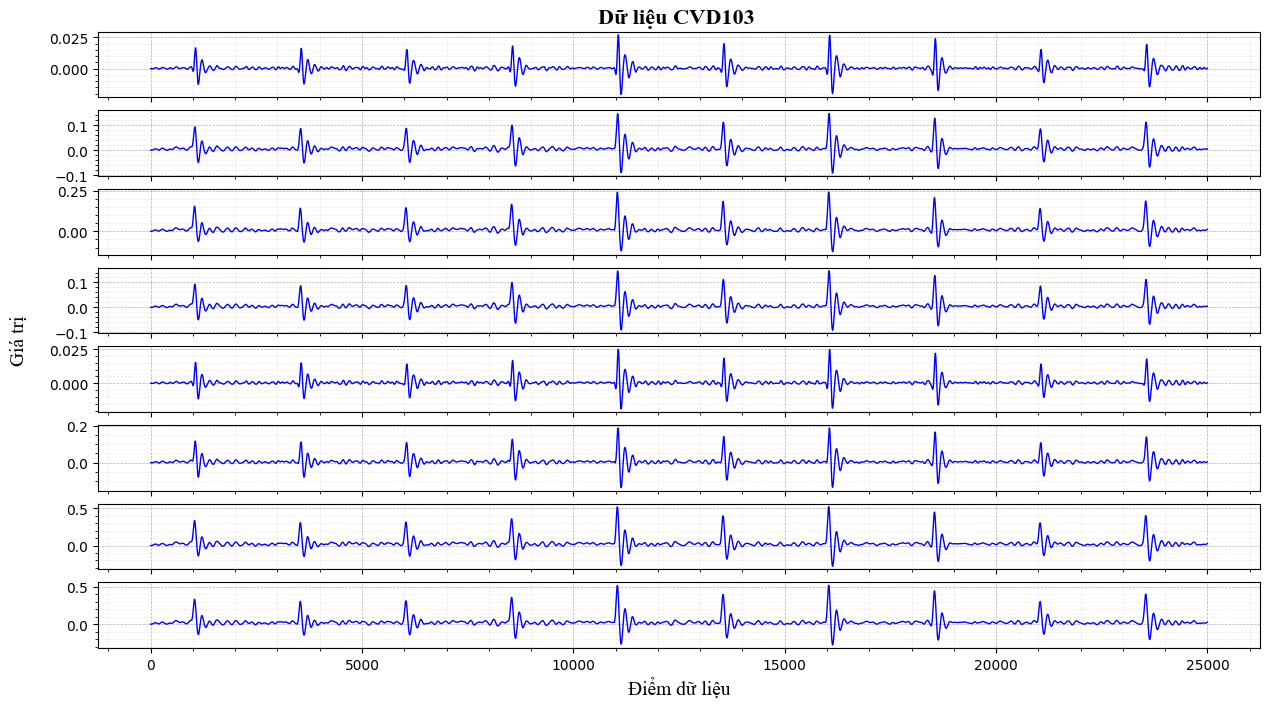

In [18]:
import matplotlib.pyplot as plt
import numpy as np

 # Giả định một mảng dữ liệu ngẫu nhiên có 100 phần tử

# Tạo một đối tượng Figure và một đối tượng Axes của Matplotlib
fig, axes = plt.subplots(8, 1, figsize=(15, 8), sharex=True)

title_font = {'family': 'Times New Roman', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Times New Roman', 'size': 14}
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'

# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(data[0,i,:], linewidth=1, color = 'b')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    # ax.set_xlim(-100, b +100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14, fontdict=label_font)
axes[0].set_title('Dữ liệu CVD103 ', fontsize=16, fontdict=title_font)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Giá trị", fontsize=14, labelpad=15, fontdict=label_font)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

<a name='3-9'></a>
### 3.9. Plot results

<a name='4'></a>
# 4.Create Data (Damaged data)

## 4.1 Ma trận hệ số mudun đàn hồi

In [ ]:
import pandas as pd

data = np.array([[1000,50,50,900,50,50,900,50,50,900,50,50,900,50,50,900,50,50,900,50,50,900,50,50,900,50,50,900],
              [1,1.05,1.1,2,2.05,2.1,3,3.05,3.1,4,4.05,4.1,5,5.05,5.1,6,6.05,6.1,7,7.05,7.1,8,8.05,8.1,9,9.05,9.1,10],
              [0,10,0,0,10,0,0,10,0,0,10,0,0,10,0,0,10,0,0,10,0,0,10,0,0,10,0,0],
              [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]])

# Chuyển mảng thành DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Lưu DataFrame vào file CSV
df.to_csv('C:\\Users\\vulv2\\OneDrive\\CompositePaper\\KQ ANSYS\TH1-1\\Data\\data.csv', index=False, encoding='utf-8')




In [ ]:
a = data = np.genfromtxt('C:\\Users\\vulv2\\OneDrive\\CompositePaper\\KQ ANSYS\\TH1-1\\Data\\data.csv', delimiter=',', skip_header=0)
a

array([[1.00e+03, 5.00e+01, 5.00e+01, 1.90e+03, 5.00e+01, 5.00e+01,
        1.90e+03, 5.00e+01, 5.00e+01, 1.90e+03, 5.00e+01, 5.00e+01,
        1.90e+03, 5.00e+01, 5.00e+01, 9.00e+02],
       [1.00e+00, 1.05e+00, 1.10e+00, 3.00e+00, 3.05e+00, 3.10e+00,
        5.00e+00, 5.05e+00, 5.10e+00, 7.00e+00, 7.05e+00, 7.10e+00,
        9.00e+00, 9.05e+00, 9.10e+00, 1.00e+01],
       [0.00e+00, 1.00e+03, 0.00e+00, 0.00e+00, 1.20e+03, 0.00e+00,
        0.00e+00, 1.10e+03, 0.00e+00, 0.00e+00, 1.50e+03, 0.00e+00,
        0.00e+00, 9.00e+02, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+00, 3.00e+00, 4.00e+00, 5.00e+00, 6.00e+00,
        7.00e+00, 8.00e+00, 9.00e+00, 1.00e+01, 1.10e+01, 1.20e+01,
        1.30e+01, 1.40e+01, 1.50e+01, 1.60e+01]])